In [36]:
%load_ext autoreload
%autoreload 2

import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from   desitarget.targets import desi_mask, bgs_mask, mws_mask, scnd_mask
from astropy.table import Table
nside=32
orig_density_per_deg = 2500
from corr_func_tools import calc_wtheta, create_axes
import astropy.io.fits as fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pixel_area = hp.nside2pixarea(nside,degrees=True)
pixel_area

3.357174580844667

In [4]:
#open randoms
randoms = S4Mock_io.read_desitargetrandoms(number=1)

In [5]:
#apply bgs mask to randoms and printed statement shows cuts 
randoms=geometry.bgs_mask_randoms(randoms)

[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


In [6]:
target_pixel_density = geometry.targ_hpmap(randoms)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


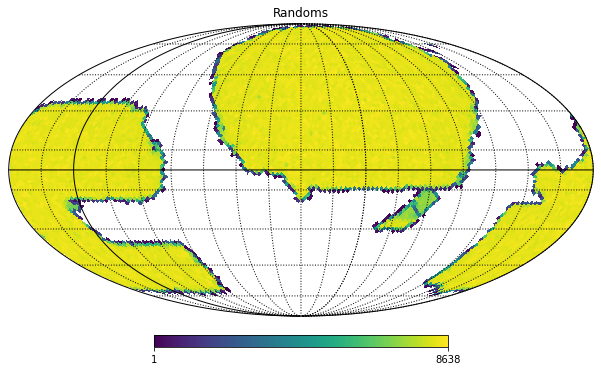

In [7]:
#target_pixel_density = geometry.targ_hpmap(randoms)
#mollview map of pixels
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

In [8]:
#Caluclate norm i.e corr_pixel_area
pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *orig_density_per_deg
filling_factor= target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor

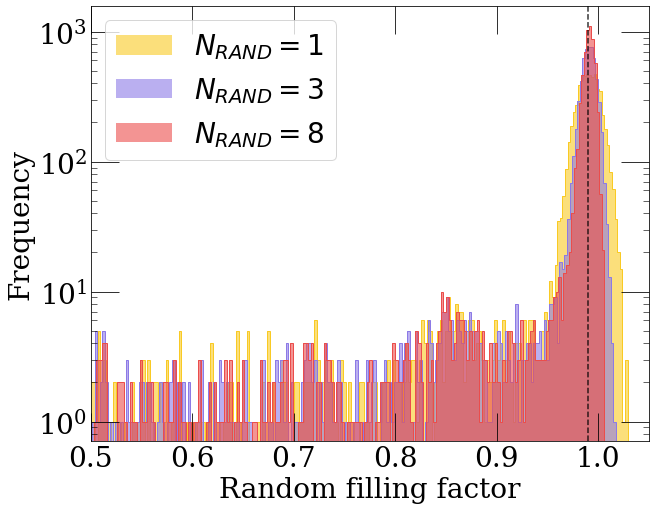

In [83]:
#histogram of filling factor: why does it have this shape?
#np.arange(0.0, 2.0, 0.025)

plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

plt.figure(figsize=(10,8))

_ = plt.hist(filling_factor, bins=400, histtype='step', color = '#f9ca24')
_ = plt.hist(filling_factor, bins=400, histtype='bar', color = '#f9ca24',alpha =0.6,label = r'$N_{RAND}=1$')

_ = plt.hist(filling_factor3, bins=400, histtype='step', color = '#8c7ae6')
_ = plt.hist(filling_factor3, bins=400, histtype='bar', color = '#8c7ae6',alpha =0.6,label = r'$N_{RAND}=3$')

_ = plt.hist(filling_factor8, bins=400, histtype='step', color = '#eb4d4b')
_ = plt.hist(filling_factor8, bins=400, histtype='bar', color = '#eb4d4b',alpha =0.6,label = r'$N_{RAND}=8$')

filling_factor8 = filling_factor8[~np.isnan(filling_factor8)]
plt.axvline(x= np.percentile(filling_factor8,50),linestyle='dashed',color='k',alpha=0.8)

plt.xlabel('Random filling factor')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.5,1.05)
plt.legend()
plt.savefig('filling_factor.png',bbox_inches='tight')

In [84]:
np.percentile(filling_factor8,50)

0.9902523446259284

In [9]:
main_survey_targs = S4Mock_io.read_mainsurvey_targets()

Runtime of 0.144719 seconds after 0 pixels
Runtime of 5.420092 seconds after 20 pixels
Runtime of 9.674601 seconds after 40 pixels
Runtime of 14.278597 seconds after 60 pixels
Runtime of 17.897459 seconds after 80 pixels
Runtime of 22.494424 seconds after 100 pixels
Runtime of 28.207783 seconds after 120 pixels
Runtime of 31.348817 seconds after 140 pixels
Runtime of 34.767400 seconds after 160 pixels
Runtime of 39.849797 seconds after 180 pixels
Runtime of 44.286925 seconds after 200 pixels
Runtime of 47.941774 seconds after 220 pixels
Runtime of 50.192781 seconds after 240 pixels
Runtime of 53.755651 seconds after 260 pixels
Runtime of 57.435937 seconds after 280 pixels
Runtime of 62.868150 seconds after 300 pixels
Runtime of 67.654557 seconds after 320 pixels
Runtime of 71.465569 seconds after 340 pixels
Runtime of 74.789631 seconds after 360 pixels
Runtime of 77.438275 seconds after 380 pixels
Runtime of 80.367031 seconds after 400 pixels
Runtime of 84.619628 seconds after 420 pixe

In [10]:
bgs_main_survey_targs = main_survey_targs[((main_survey_targs['DESI_TARGET'] & desi_mask['BGS_ANY']) != 0)]
mws_main_survey_targs = main_survey_targs[((main_survey_targs['DESI_TARGET'] & desi_mask['MWS_ANY']) != 0)]

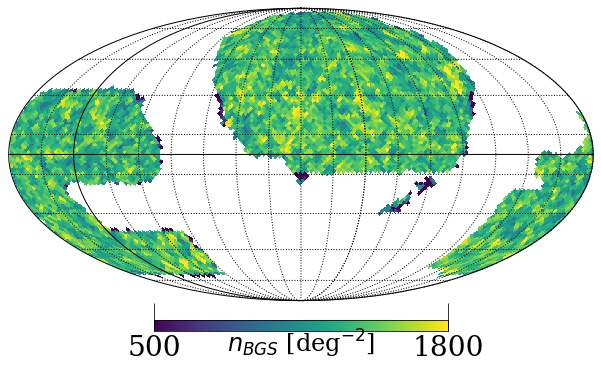

In [11]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

bgs_target_pixel_density = geometry.targ_hpmap(bgs_main_survey_targs,norm=corr_pixel_area,filling_factor=filling_factor)

#mollview map of pixels
#mollview map of pixels
hp.mollview(bgs_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=1800,unit = r'$n_{BGS}$ [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

f = plt.gcf() # accessing the current figure...
CbAx = f.get_children()[2] # ... then the colorbar's elements
coord_text_obj = CbAx.get_children()[1] # [1] corresponds to the particular label of the
                                        # colorbar, i.e. "Field value" in this case
coord_text_obj.set_fontsize(24)
plt.savefig('bgs_map.png',bbox_inches='tight')

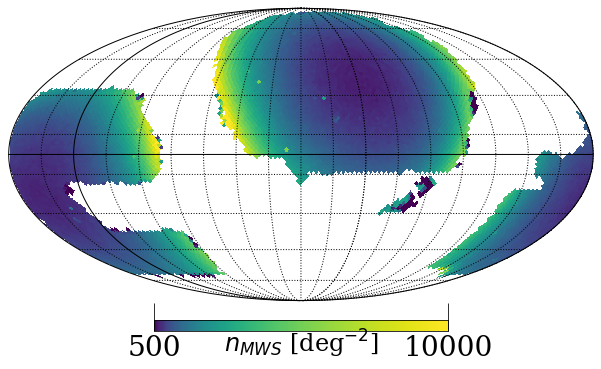

In [12]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

mws_target_pixel_density = geometry.targ_hpmap(mws_main_survey_targs,norm=corr_pixel_area,filling_factor=filling_factor)

#mollview map of pixels
#mollview map of pixels
hp.mollview(mws_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=10000,unit = r'$n_{MWS}$ [deg$^{-2}$]',norm='log')
hp.graticule(dpar=5, dmer=5) 

f = plt.gcf() # accessing the current figure...
CbAx = f.get_children()[2] # ... then the colorbar's elements
coord_text_obj = CbAx.get_children()[1] # [1] corresponds to the particular label of the
                                        # colorbar, i.e. "Field value" in this case
coord_text_obj.set_fontsize(24)
plt.savefig('mws_map.png',bbox_inches='tight')

In [13]:
bgs_bright_targs = main_survey_targs[((main_survey_targs['BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]

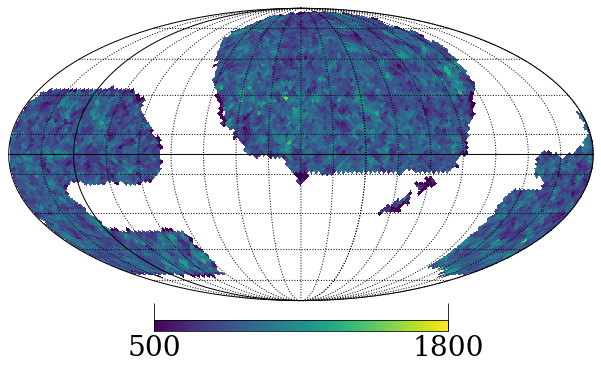

In [14]:

bgs_bright_targs_density = geometry.targ_hpmap(bgs_bright_targs,norm=corr_pixel_area,filling_factor=filling_factor)
hp.mollview(bgs_bright_targs_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=1800)
hp.graticule(dpar=5, dmer=5) 


[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


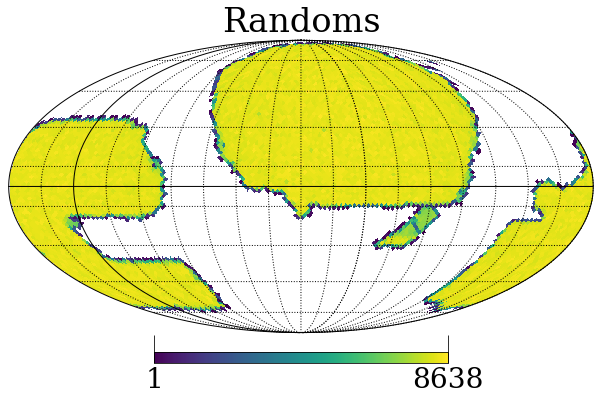

In [15]:

randoms = S4Mock_io.read_desitargetrandoms(number=1)
randoms=geometry.bgs_mask_randoms(randoms)
target_pixel_density = geometry.targ_hpmap(randoms)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)


In [29]:
targ_pix = geometry.radec2pix(bgs_bright_targs['RA'],bgs_bright_targs['DEC'], nside=32)
bgs_bright_targs['HPX']=targ_pix

targ_pix = geometry.radec2pix(randoms['RA'],randoms['DEC'], nside=32)
randoms=Table(randoms)
randoms['HPX']=targ_pix


pix = geometry.rand_inrect(240,270,20,50)

bgs_bright_targs_small = bgs_bright_targs[np.in1d(bgs_bright_targs['HPX'].data,pix)]
randoms_small = randoms[np.in1d(randoms['HPX'].data,pix)]


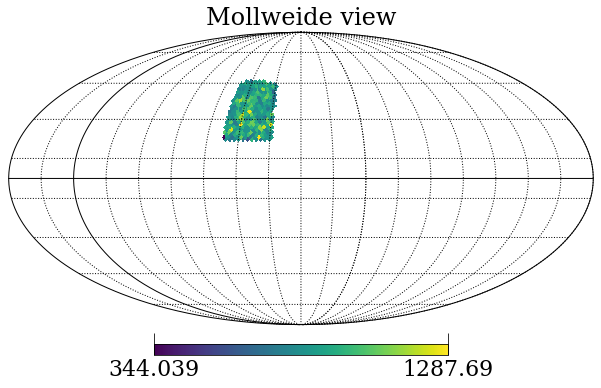

In [30]:
target_pixel_density = geometry.targ_hpmap(bgs_bright_targs_small)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white')
hp.graticule(dpar=5, dmer=5)


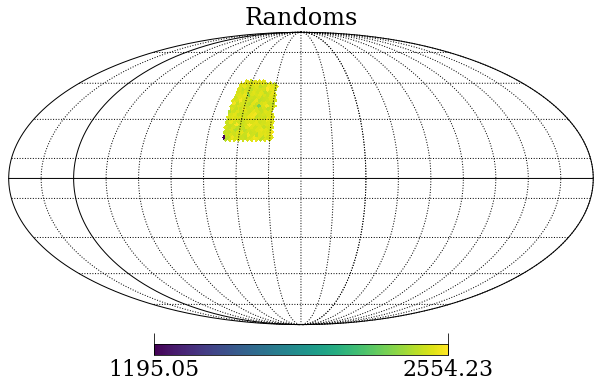

In [31]:
target_pixel_density = geometry.targ_hpmap(randoms_small)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)


In [32]:
targ_wtheta =  calc_wtheta(bgs_bright_targs_small['RA'],bgs_bright_targs_small['DEC'],randoms_small['RA'],randoms_small['DEC'],nbins=30)

In [20]:
#mock_all with error bars 

wtheta_mock = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_mock.npy')
mean2 = np.mean(wtheta_mock,axis=0)
stdev2 = np.std(wtheta_mock,axis=0)

#wtheta_main_mock = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_main_mock.npy')

In [43]:
wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)


In [38]:
nbins=30

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_clustering.dat.fits')
dat = x[1].data


x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full.ran.fits')
ran = x[1].data 

fba_wtheta = calc_wtheta(dat['RA'],dat['DEC'],ran['RA'],ran['DEC'],nbins=nbins)

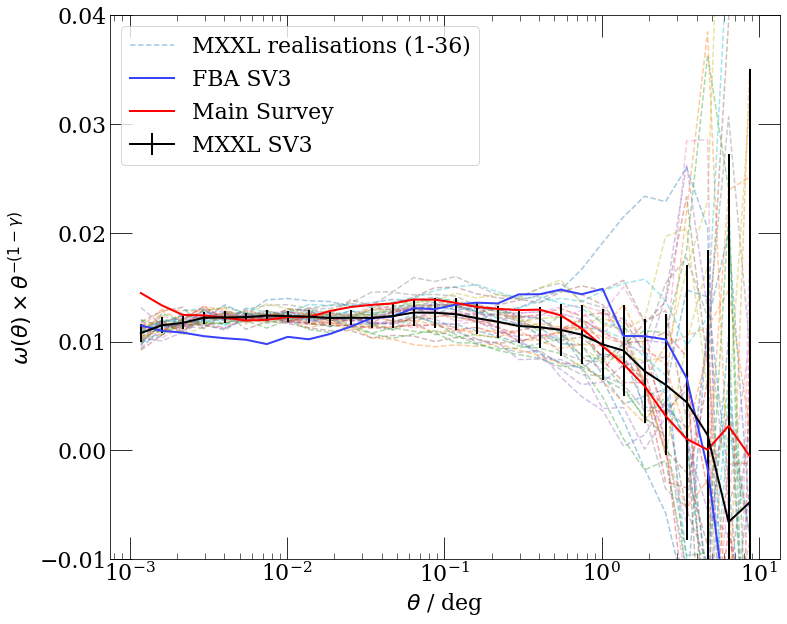

In [50]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1,y_axis1,yerr=y_axis_err,color= 'black',label='MXXL SV3',zorder=3,linewidth=2)


#real all
x_axis,y_axis = create_axes(fba_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='FBA SV3',zorder=3,linewidth=2)

#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= 'Red',label='Main Survey',zorder=3,linewidth=2)

"""
#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_mock[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-6)')


for i in range(1,len(wtheta_mock)):
    x_axis1,y_axis1 = create_axes(wtheta_mock[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean2)
x_axis1,y_axis_err = create_axes(stdev2)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)



#mock main all
x_axis,y_axis = create_axes(wtheta_main_mock)

plt.plot(x_axis,y_axis,color= 'red',label='MXXL',zorder=3,linewidth=2)
"""


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(-0.01,0.04)
plt.legend()

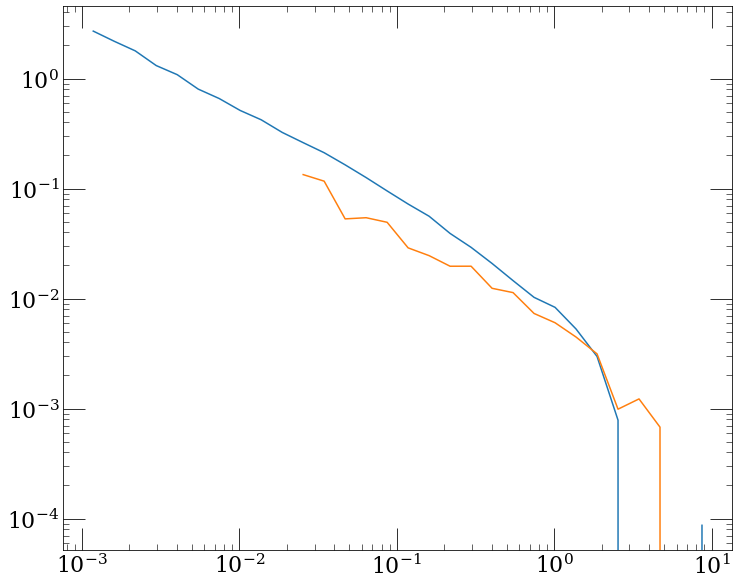

In [51]:
nbins =30

plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

bins = np.logspace(-3, 1, nbins + 1, base=10)
x_axis = []
for i in range(len(bins)-1):
    x_axis.append((bins[i]+bins[i+1])/2)
    
plt.plot(x_axis,targ_wtheta)
plt.plot(x_axis,mean)
plt.xscale('log')
plt.yscale('log')


In [ ]:
#select only whole healpix 